<a href="https://colab.research.google.com/github/imadegunawinangun/NLP-Desi---Deteksi-Emosi/blob/main/Desi_Detektor_Emosi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!git clone https://github.com/imadegunawinangun/NLP-Desi---Deteksi-Emosi

Cloning into 'NLP-Desi---Deteksi-Emosi'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 38 (delta 19), reused 14 (delta 3), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [3]:
!ls NLP-Desi---Deteksi-Emosi

archive.zip  Desi_Detektor_Emosi.ipynb	   LICENSE
data.txt     imdb_indonesian_movies_2.csv  test.txt


In [4]:
import pandas as pd
import os
import numpy as np


In [5]:
read_file = pd.read_csv (r'NLP-Desi---Deteksi-Emosi/data.txt',error_bad_lines=False,sep=';')
read_file.to_csv ('NLP-Desi---Deteksi-Emosi/data.csv', index=None)

b'Skipping line 144: expected 2 fields, saw 3\nSkipping line 163: expected 2 fields, saw 3\nSkipping line 460: expected 2 fields, saw 3\nSkipping line 496: expected 2 fields, saw 3\nSkipping line 541: expected 2 fields, saw 3\nSkipping line 557: expected 2 fields, saw 3\nSkipping line 697: expected 2 fields, saw 3\nSkipping line 882: expected 2 fields, saw 3\nSkipping line 890: expected 2 fields, saw 3\nSkipping line 908: expected 2 fields, saw 3\nSkipping line 911: expected 2 fields, saw 3\nSkipping line 1037: expected 2 fields, saw 3\nSkipping line 1070: expected 2 fields, saw 3\nSkipping line 1173: expected 2 fields, saw 3\nSkipping line 1193: expected 2 fields, saw 3\nSkipping line 1197: expected 2 fields, saw 3\nSkipping line 1317: expected 2 fields, saw 3\nSkipping line 1698: expected 2 fields, saw 3\nSkipping line 1716: expected 2 fields, saw 3\nSkipping line 1874: expected 2 fields, saw 3\nSkipping line 2188: expected 2 fields, saw 3\nSkipping line 2228: expected 2 fields, saw 

In [6]:
datadir = 'NLP-Desi---Deteksi-Emosi/'
columns = ['kalimat', 'emosi']
data = pd.read_csv(os.path.join(datadir, 'data.csv'), names = columns)
#data['emosi']=data['emosi'].astype("category")
pd.set_option('display.max_colwidth', -1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,kalimat,emosi
0,saya tidak merasa terhina,kesedihan
1,saya bisa berubah dari merasa sangat putus asa menjadi sangat berharap hanya dari berada di sekitar seseorang yang peduli dan terjaga,kesedihan
2,saya mengambil waktu sebentar untuk memposting saya merasa serakah salah,kemarahan
3,saya pernah merasa nostalgia tentang perapian saya akan tahu bahwa itu masih di properti,cinta
4,saya merasa kesal,kemarahan
...,...,...
15853,saya hanya memiliki waktu yang sangat singkat di beanbag dan saya berkata kepada anna bahwa saya merasa seperti saya telah dipukuli,kesedihan
15854,saya sekarang berbalik dan saya merasa menyedihkan bahwa saya masih menunggu meja dan subbing dengan gelar mengajar,kesedihan
15855,saya merasa kuat dan baik secara keseluruhan,kegembiraan
15856,Saya merasa ini adalah komentar yang kasar dan saya senang bahwa t,kemarahan


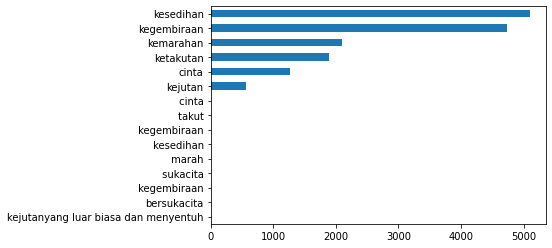

In [7]:
data.emosi.value_counts().sort_values().plot(kind = 'barh')

In [8]:
from sklearn.utils import shuffle

def data_balancing(data, samples_per_bin ):
  print('total data:', len(data))
  remove_list = []
  for j in range(1):
    list_ = []
    for i in range(len(data)):
      list_.append(i)

    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
  list_ = []
  list_.append(data)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
  print('removed:', len(remove_list))
  data_=data.copy()
  data_.drop(data_.index[remove_list], inplace=True)
  print('remaining:', len(data_))
  return data_

total data: 5094
removed: 4094
remaining: 1000
total data: 4739
removed: 3739
remaining: 1000
total data: 2096
removed: 1096
remaining: 1000
total data: 1886
removed: 886
remaining: 1000
total data: 1266
removed: 266
remaining: 1000


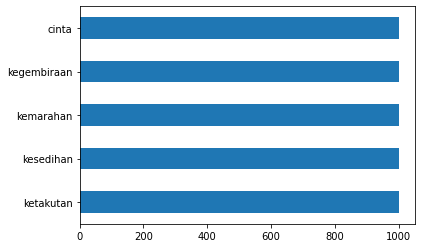

In [9]:
data.loc[data['emosi'] == 'kejutan']
df = pd.concat([data_balancing(data.loc[data['emosi'] == 'kesedihan'],1000), 
                data_balancing(data.loc[data['emosi'] == 'kegembiraan'],1000),
                data_balancing(data.loc[data['emosi'] == 'kemarahan'],1000),
                data_balancing(data.loc[data['emosi'] == 'ketakutan'],1000),
                data_balancing(data.loc[data['emosi'] == 'cinta'],1000)], 
               sort=True)
df['emosi']=df['emosi'].astype("category")
df.emosi.value_counts().plot(kind = 'barh')


In [10]:
category = pd.get_dummies(df.emosi)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='emosi')
df_baru

,kalimat,cinta,kegembiraan,kemarahan,kesedihan,ketakutan
16,saya tidak benar-benar merasa malu,0,0,0,1,0
18,saya mulai merasa sentimental tentang boneka yang saya miliki sebagai seorang anak dan mulai koleksi boneka barbie vintage dari tahun enam puluhan,0,0,0,1,0
25,saya masih mencintai saya dan berharap yang terbaik untuknya saya tidak bisa lagi mentolerir efek yang dimiliki bm pada kehidupan kita dan fakta yang telah mengubah saya menjadi orang yang pemarah pahit yang tidak selalu sangat baik kepada orang-orang di sekitarnya ketika dia merasa stres,0,0,0,1,0
40,saya berencana untuk berbagi cerita kehidupan sehari-hari saya inspirasi petualangan perjalanan dan kreasi buatan tangan dengan Anda dan berharap Anda juga akan merasa terinspirasi,0,0,0,1,0
70,saya merasa sengsara tetapi saya juga ibu paling bangga di bumi,0,0,0,1,0
...,...,...,...,...,...,...
15772,saya bagian pada dasarnya mereka merasa simpatik sedikit terlambat menurut pendapat saya hachi bergegas untuk menemukan bahwa nobu sedang mencoba untuk membantu nana dengan meniup ke dalam kantong kertas,1,0,0,0,0
15794,Saya lebih baik dari perasaan Anda yang lain tetapi perasaan diterima,1,0,0,0,0
15816,Saya merasa akan ada sekuel dan saya ingin menutup akhir buku ini,1,0,0,0,0
15829,saya merasa itu tidak akan mencintai saya tidak memperingatkan Anda tentang krisis sosial yang akan datang yang dihadapi montana,1,0,0,0,0


In [11]:
def load_img_steering(df):
  teks = []
  label = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    teks.append((indexed_data[0]))
    label.append(indexed_data[[1, 2, 3, 4, 5]] )
    # left image append
    #image_path.append(os.path.join(datadir,left.strip()))
    #steering.append(float(indexed_data[3])+0.15)
    # right image append
    #image_path.append(os.path.join(datadir,right.strip()))
    #steering.append(float(indexed_data[3])-0.15)
  data_teks = np.asarray(teks)
  label_teks = np.asarray(label)
  return   data_teks , label_teks
 
data_teks, label_teks = load_img_steering(df_baru)


In [12]:
data_teks

array(['saya tidak benar-benar merasa malu',
       'saya mulai merasa sentimental tentang boneka yang saya miliki sebagai seorang anak dan mulai koleksi boneka barbie vintage dari tahun enam puluhan',
       'saya masih mencintai saya dan berharap yang terbaik untuknya saya tidak bisa lagi mentolerir efek yang dimiliki bm pada kehidupan kita dan fakta yang telah mengubah saya menjadi orang yang pemarah pahit yang tidak selalu sangat baik kepada orang-orang di sekitarnya ketika dia merasa stres',
       ...,
       'Saya merasa akan ada sekuel dan saya ingin menutup akhir buku ini',
       'saya merasa itu tidak akan mencintai saya tidak memperingatkan Anda tentang krisis sosial yang akan datang yang dihadapi montana',
       'saya merasa sangat simpatik terhadap mereka'], dtype='<U403')

In [13]:
label_teks = np.array(label_teks, dtype=np.int32)
label_teks

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int32)

In [14]:
label_teks.shape

(5000, 5)

In [15]:
from sklearn.model_selection import train_test_split

kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(data_teks, label_teks, test_size=0.2)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
num_words = 10000
tokenizer = Tokenizer(num_words, oov_token='*')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
x_train_tokens = tokenizer.texts_to_sequences(kalimat_latih)
x_valid_tokens = tokenizer.texts_to_sequences(kalimat_test)

x_train_padded = pad_sequences(x_train_tokens) 
x_valid_padded = pad_sequences(x_valid_tokens)


In [17]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_valid_tokens]
num_tokens = np.array(num_tokens)

In [18]:
np.mean(num_tokens)

17.61

In [19]:
np.max(num_tokens)

67

In [20]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

37

In [21]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.946

In [22]:
print(kalimat_latih[0])
print(np.array(x_train_tokens[0]))
print(np.array(x_train_padded[0]))
print(np.array(tokenizer.sequences_to_texts(x_train_padded)[0]))

saya merasa sejuk dan santai setelah menikmati master yang luar biasa ini
[   2    3 2247    4  489  122  328 1125    5   92  105   11]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    2
    3 2247    4  489  122  328 1125    5   92  105   11]
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * saya merasa sejuk dan santai setelah menikmati master yang luar biasa ini


In [23]:
pip install -q -U keras-tuner


     |████████████████████████████████| 96 kB 3.5 MB/s 


In [24]:
import kerastuner.tuners as kt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [25]:
import tensorflow as tf

def model_rnn1(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(num_words, hp.Int("Output Embed",min_value= 64, max_value = 256, step= 64), input_length=max_tokens,name='layer_embedding'))
  model.add(tf.keras.layers.LSTM(hp.Int("LSTM",min_value= 64, max_value = 256, step= 64)))

  for i in range(hp.Int("Dense Layers", min_value=1, max_value=3)):
      model.add(tf.keras.layers.Dense(hp.Int(f"Dense_{i}_layer", min_value= 64, max_value = 256, step= 64), 
                                   activation='relu'))

  model.add(tf.keras.layers.Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(hp.Choice(f"learning_rate", [ 3e-4,1e-3])),metrics=['accuracy'])
  return model
def model_rnn():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(num_words, 8, input_length=max_tokens,name='layer_embedding'))
  model.add(tf.keras.layers.LSTM(64))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(64, activation='relu'))


  model.add(tf.keras.layers.Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
  return model


In [26]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90 ):  


      print("\nAkurasi telah mencapai >90%!")

      self.model.stop_training = True

callbacks90 = myCallback()

In [ ]:
class MyTuner(kt.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`

    super(MyTuner, self).run_trial(trial, *args, **kwargs)

# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_rnn1,
                objective='val_accuracy',
                max_trials=1000,)
# Don't pass epochs or batch_size here, let the Tuner tune them.

tuner.search(
    x_train_padded, y_latih,
        validation_split=0.2,
            epochs=50,
             steps_per_epoch = 500,
            callbacks=[
              tf.keras.callbacks.EarlyStopping(
              monitor='val_accuracy',
              patience=5,
              ),callbacks90
              ]
             )

Trial 38 Complete [00h 02m 39s]
val_accuracy: 0.668749988079071

Best val_accuracy So Far: 0.7512500286102295
Total elapsed time: 02h 06m 39s

Search: Running Trial #39

Hyperparameter    |Value             |Best Value So Far 
Output Embed      |192               |192               
LSTM              |256               |192               
Dense Layers      |1                 |1                 
Dense_0_layer     |128               |192               
learning_rate     |0.0003            |0.001             
Dense_1_layer     |256               |192               
Dense_2_layer     |192               |64                

Epoch 1/50
425/500 [========================>.....] - ETA: 3s - loss: 1.5721 - accuracy: 0.2689

In [ ]:
model = model_rnn()
num_epochs = 30
history = model.fit(x_train_padded, y_latih, epochs=num_epochs, 
                    validation_split=0.2)